In [1]:
import os
import numpy as np
import pandas as pd
import plotly as py
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import contextily as ctx
import matplotlib.image as mpimg
import matplotlib
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs 
from plotly.offline import init_notebook_mode
from plotly.offline import plot,iplot
init_notebook_mode(connected=True)
import seaborn as sns
import geos
import mpl_toolkits
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc

In [2]:
data=pd.read_csv('student_alcohol_consumption/student-mat.csv')

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]), <a list of 16 Text yticklabel objects>)

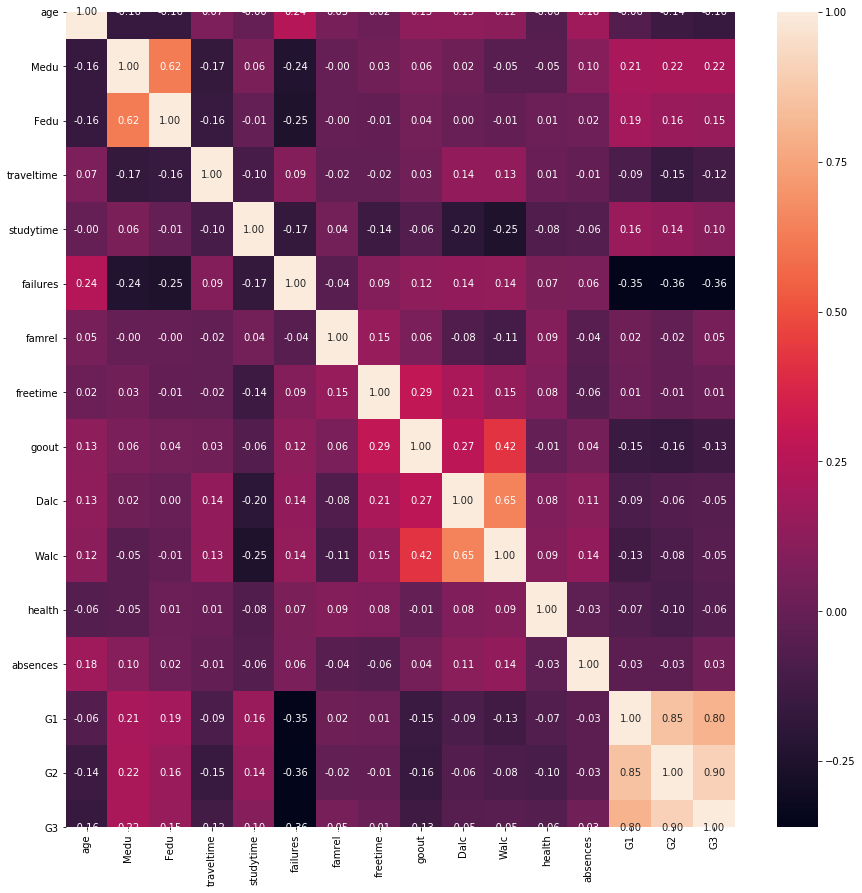

In [6]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,fmt=".2f",cbar=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

Above is a correlation plot of the various variables. Only correlation we can find is with G1,G2,G3 which are grades.

In [7]:
data['Dalc']=data['Dalc']+data['Walc']

In [16]:
list1=[]
for i in range(11):
    list1.append(len(data[data.Dalc==i]))

In [17]:
list1

[0, 0, 150, 66, 60, 45, 35, 17, 9, 4, 9]

Text(0.5, 1.0, 'Alcohol consumption of students')

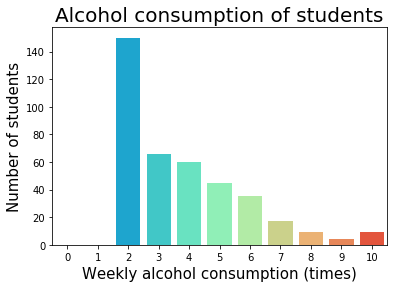

In [44]:
ax=sns.barplot(x=[0,1,2,3,4,5,6,7,8,9,10],y=list1,palette='rainbow')
plt.ylabel('Number of students',size=15)
plt.xlabel('Weekly alcohol consumption (times)',size=15)
plt.title('Alcohol consumption of students',size=20)

This shows that maximum students drink not more than 2 times a week. Mostly on weekends.

Text(0.5, 0, 'Grade distribution of the students')

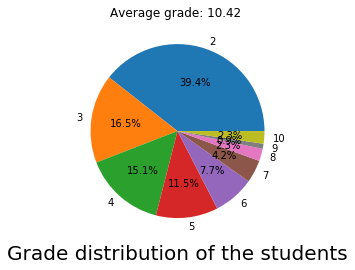

In [86]:
labels=[2,3,4,5,6,7,8,9,10]
size=[]
for i in range(2,11):
    size.append(sum(data.G3[data.Dalc==i]))
total_grade=sum(size)
average=total_grade/(len(data))
average=np.round(average,2)
plt.pie(size,labels=labels,autopct='%1.1f%%')
plt.title('Average grade: {} '.format(average))
plt.xlabel('Grade distribution of the students',size=20)

In [56]:
total_grade

4114

In [93]:
average

10.42

In [94]:
data['Average']=['above average' if i> average else 'under average' for i in data.G3]

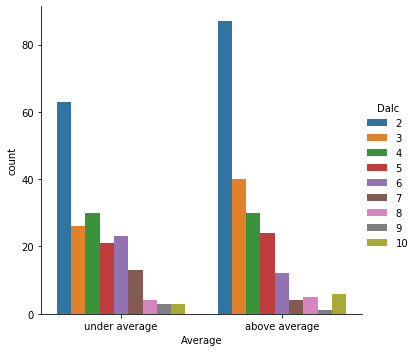

In [104]:
sns.factorplot('Average',data=data ,kind='count',hue='Dalc')

The above factor plot shows the grades earned by students for each alcohol consumption level.

People who drink 2 times a week are higher in both the criteria. However, they dominate the above average section which indicates that limited drinking isn't effecting grades.

Text(0, 0.5, 'Grade scores')

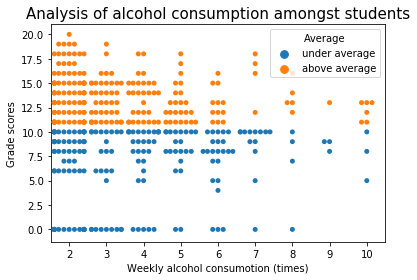

In [110]:
ax=sns.swarmplot(x='Dalc',y='G3',hue='Average',data=data)
ax.set_title('Analysis of alcohol consumption amongst students',size=15)
ax.set_xlabel('Weekly alcohol consumotion (times)')
ax.set_ylabel('Grade scores')

The above swarm plots indicate that the highest scores are acheived by students who drink 2 times a week.

In [113]:
average_top=sum(data.G3[data.Dalc==2])/len(data[data.Dalc==2])
average_top=np.round(average_top,2)
average_top

10.81

Above is the average score of all the students who drink 2 times a week